# MUT Power Up Players and Their Eligible Teams
#### - Matt , last updated: Nov 9, 2018<br>


In [1]:
date = 'nov9'

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('mut_powerups.csv').drop('Unnamed: 0', axis=1)
data = data[ data['Type'].str.strip() != 'Legend']
df = pd.concat( [data, data['All Teams'].str.replace(',', '|').str.get_dummies()], axis=1)
numeric_data = df.select_dtypes(include=[float, int])
obj_data = df.select_dtypes(exclude=[float, int])
numeric_data['numTeams'] = numeric_data.sum(axis=1).astype(int)
players = pd.concat([obj_data, numeric_data], axis=1)
players['Position'] = players['Position'].str.replace('RB', 'HB').str.replace('Qb', 'QB')
players = players[ players['numTeams'] != 0]
players['Type'] = players['Type'].str.strip()
players_ = players[ (players['Type']!='Legend') & (players['Type']!='Legend Ltd')]
players.to_csv(f'mut_powerups_{date}.csv')
players = players_

In [3]:
players_['Type'].value_counts()

Power Up     155
Legend PU     36
HoF            5
Captain        4
Master         2
MF             1
NG             1
Name: Type, dtype: int64

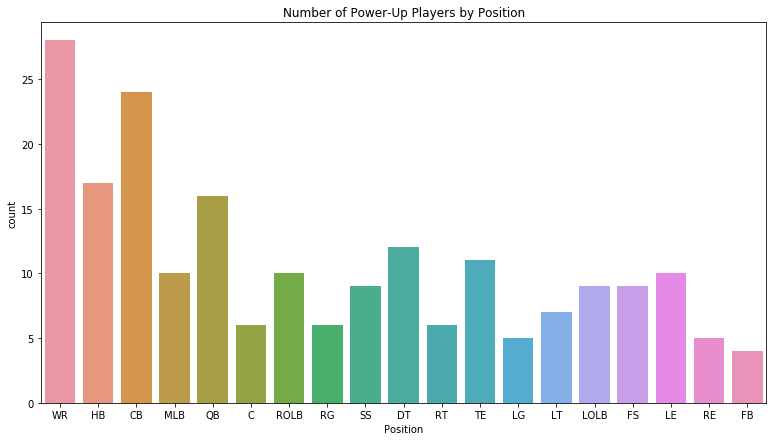

In [4]:
plt.figure(figsize=(13, 7))
sns.countplot(players['Position']);
plt.title('Number of Power-Up Players by Position');

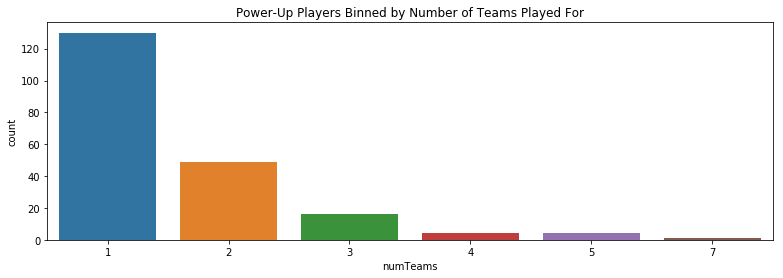

In [5]:
# Number of teams per power up player
plt.figure(figsize=(13, 4))
sns.countplot(players['numTeams']);
plt.title('Power-Up Players Binned by Number of Teams Played For');

In [6]:
numeric_data = players_.select_dtypes(include=[float, int])

a = numeric_data.sum().sort_values(ascending=False)[1:]

pal = {'PHI':'xkcd:green', 'NE': 'darkblue', 'NO':'gold', 'GB':'green',
       'MIN':'xkcd:purple', 'WAS':'maroon', 'TEN': 'cyan', 'TB':'xkcd:crimson',
       'SEA':'chartreuse', 'LAC':'xkcd:azure', 'ATL':'xkcd:red',
       'BAL':'indigo', 'LAR':'xkcd:khaki', 'KC':'red', 'NYJ': 'darkgreen',
       'JAX':'xkcd:darkgreen', 'OAK':'grey', 'BUF':'xkcd:blue', 'CAR':'aqua',
       'CLE':'chocolate', 'PIT':'xkcd:yellow', 'NYG':'blue', 'SF':'xkcd:gold',
       'CHI':'xkcd:orange', 'DAL':'xkcd:darkblue', 'MIA':'xkcd:aqua',
       'DEN':'xkcd:orangered', 'HOU':'xkcd:navy', 'ARI':'xkcd:red',
       'CIN':'xkcd:orange', 'DET':'xkcd:lightblue', 'IND':'xkcd:azure'}

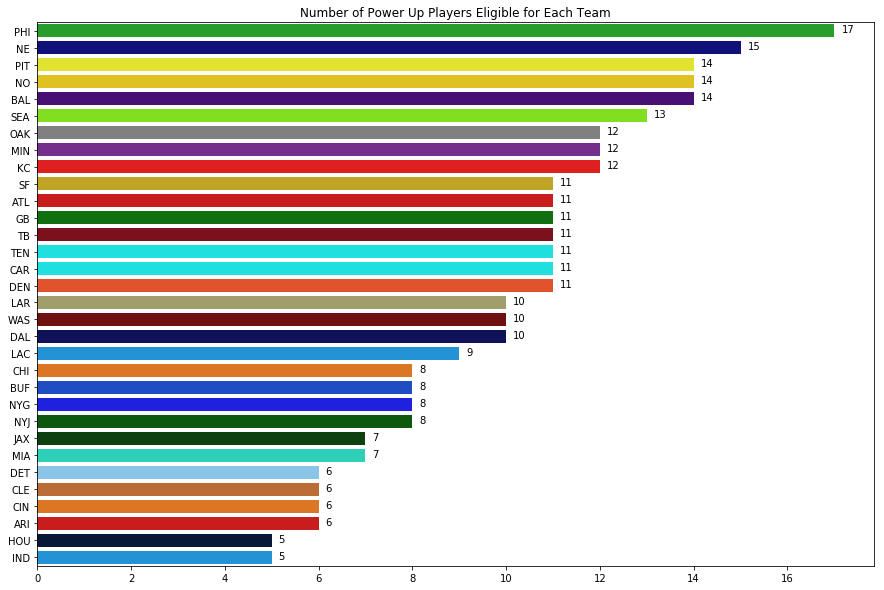

In [7]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=a.values, y=a.index, palette=pal)
for p in ax.patches:
    if np.isnan(p.get_width()):
        gh = 0.0
    else:
        gh = np.round(p.get_width(), 2)
                
    ax.annotate(int(gh), (np.round(gh+0.15, 3), p.get_y()+0.5))
ax.set_title('Number of Power Up Players Eligible for Each Team');

### Biggest journeymen

In [8]:
small = pd.concat([obj_data[['Name', 'Position', 'Type', 'All Teams']], players_['numTeams']], axis=1)
small['All Teams'] = small['All Teams'].str.lstrip(',')
small[ small['numTeams'] >= 4].sort_values('numTeams', ascending=False)
small = small[ small['Type'] != 'Legend']

In [9]:
team_abbrevs = list(pal.keys())
team_list = []

players = players.dropna()

players.reset_index(drop=True, inplace=True)
small.reset_index(drop=True, inplace=True)

for team in team_abbrevs:
    current_team = players[ players[team]==1]
    indices = current_team.index.values
    team_list.append(small.iloc[indices])

# Team Lists
**---------------------------------------------------------------**

![Image](http://content.sportslogos.net/logos/7/167/thumbs/960.gif)

##  Philadelphia Eagles 

In [10]:
i=0
team_list[i]

,Name,Position,Type,All Teams,numTeams
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
107,Howie Long,RT,Legend Ltd,OAK,NaN
108,Tim Brown,WR,Legend PU,"OAK,TB",2.0
109,Donovan McNabb,QB,Legend PU,"PHI,MIN",2.0
113,Steve Hutchinson,LG,Legend PU,"SEA,MIN,TEN",3.0
146,Rodney Hudson,C,Power Up,"OAK,KC",2.0
147,Rashaan Melvin,CB,Power Up,"OAK,TB,BAL,NE,IND",5.0
148,Fletcher Cox,DT,Power Up,PHI,1.0
149,Zach Ertz,TE,Power Up,PHI,1.0
150,Brandon Graham,LE,Power Up,PHI,1.0


![Image](http://content.sportslogos.net/logos/7/151/thumbs/y71myf8mlwlk8lbgagh3fd5e0.gif)

## New England Patriots

In [11]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
49,Jabaal Sheard,RE,Power Up,"IND,CLE,NE",3.0
99,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
119,Sean Taylor,FS,Legend PU,WAS,1.0
120,Champ Bailey,CB,Legend PU,"WAS,DEN",2.0
121,David Andrews,C,Power Up,NE,1.0
122,Tom Brady,QB,Power Up,NE,1.0
123,James Develin,FB,Power Up,NE,1.0
124,Julian Edelman,WR,Power Up,NE,1.0
125,Rob Gronkowski,TE,Power Up,NE,1.0
126,Devin McCourty,FS,Power Up,NE,1.0


![Image](http://content.sportslogos.net/logos/7/175/thumbs/907.gif)

## New Orleans Saints

In [12]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
42,Jimmy Graham,TE,Power Up,"GB,NO,SEA",3.0
101,Willie Roaf,LT,Legend PU,"NO,KC",2.0
102,Ricky Williams,HB,Master,"NO,MIA,BAL",3.0
103,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
127,Dont'a Hightower,LOLB,Power Up,NE,1.0
128,Stephon Gilmore,CB,Power Up,"NE,BUF",2.0
129,Cameron Jordan,LE,Power Up,NO,1.0
130,Alvin Kamara,HB,Power Up,NO,1.0
131,Marson Lattimore,CB,Power Up,NO,1.0
132,Ryan Ramczyk,RT,Power Up,NO,1.0


![Image](http://content.sportslogos.net/logos/7/171/thumbs/dcy03myfhffbki5d7il3.gif)

## Green Bay Packers

In [13]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
12,Micah Hyde,SS,Power Up,"BUF,GB",2.0
37,Davante Adams,WR,Power Up,GB,1.0
38,David Bakhtiari,LT,Power Up,GB,1.0
39,Kenny Clark,DT,Power Up,GB,1.0
40,Aaron Rodgers,QB,Power Up,GB,1.0
41,Ha Ha Clinton-Dix,FS,Power Up,GB,1.0
42,Jimmy Graham,TE,Power Up,"GB,NO,SEA",3.0
68,Casey Hayward,CB,Power Up,"LAC,GB",2.0
75,Josh Sitton,LG,Power Up,"MIA,GB,CHI",3.0
95,Ted Hendricks,LOLB,Legend PU,"IND,GB,OAK",3.0


![Image](http://content.sportslogos.net/logos/7/172/thumbs/17227042013.gif)

## Minnesota Vikings

In [14]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
76,Anthony Barr,ROLB,Power Up,MIN,1.0
77,Stefon Diggs,WR,Power Up,MIN,1.0
78,Everson Griffen,RE,Power Up,MIN,1.0
79,Xavier Rhodes,CB,Power Up,MIN,1.0
80,Harrison Smith,FS,Power Up,MIN,1.0
81,Adam Thielen,WR,Power Up,MIN,1.0
82,Linval Joseph,DT,Power Up,"MIN,NYG",2.0
99,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
100,John Randle,DT,Legend PU,"MIN,SEA",2.0
107,Howie Long,RT,Legend Ltd,OAK,NaN


![Image](http://content.sportslogos.net/logos/7/168/thumbs/im5xz2q9bjbg44xep08bf5czq.gif)

## Washington Redskins

In [15]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
88,Bruce Smith,RE,Legend PU,"BUF,WAS",2.0
117,Steve Young,QB,Legend PU,"TB,SF",2.0
118,Eddie George,HB,Legend PU,TEN,1.0
179,Malcolm Butler,CB,Power Up,"TEN,NE",2.0
180,Delanie Walker,TE,Power Up,"TEN,SF",2.0
181,Ryan Kerrigan,LOLB,Power Up,WAS,1.0
182,Jordan Reed,TE,Power Up,WAS,1.0
183,Brandon Scherff,RG,Power Up,WAS,1.0
186,Ronde Barber,CB,Legend PU,TB,1.0


![Image](http://content.sportslogos.net/logos/7/160/thumbs/1053.gif)

## Tennessee Titans

In [16]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
99,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
103,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
111,Reggie White,LE,Legend PU,"PHI,GB,CAR",3.0
116,Derrick Brooks,ROLB,Legend PU,TB,1.0
174,Gerald McCoy,DT,Power Up,TB,1.0
175,Brent Grimes,CB,Power Up,"TB,ATL,MIA",3.0
176,Kevin Byard,FS,Power Up,TEN,1.0
177,Jurell Casey,RE,Power Up,TEN,1.0
178,Taylor Lewan,LT,Power Up,TEN,1.0
183,Brandon Scherff,RG,Power Up,WAS,1.0


![Image](http://content.sportslogos.net/logos/7/176/thumbs/17636702014.gif)

## Tampa Bay Buccaneers

In [17]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
103,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
106,Kevin Mawae,C,Legend Ltd,NYJ,NaN
114,Jerry Rice,WR,Captain,"SF,OAK,SEA",3.0
115,Terell Owens,WR,HoF,"SF,PHI,DAL,BUF,CIN",5.0
145,Kelechi Osemele,LG,Power Up,"OAK,BAL",2.0
169,Kyle Juszczyk,FB,Power Up,"SF,BAL",2.0
170,Richard Sherman,CB,Power Up,"SF,SEA",2.0
171,Lavonte David,ROLB,Power Up,TB,1.0
172,Demar Dotson,RT,Power Up,TB,1.0
173,Mike Evans,WR,Power Up,TB,1.0


![Image](http://content.sportslogos.net/logos/7/180/thumbs/pfiobtreaq7j0pzvadktsc6jv.gif)

## Seattle Seahawks

In [18]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
36,Golden Tate III,WR,Power Up,"DET,SEA",2.0
42,Jimmy Graham,TE,Power Up,"GB,NO,SEA",3.0
100,John Randle,DT,Legend PU,"MIN,SEA",2.0
111,Reggie White,LE,Legend PU,"PHI,GB,CAR",3.0
112,Rod Woodson,CB,HoF,"PIT,SF,BAL,OAK",4.0
162,Marcus Gilbert,RT,Power Up,PIT,1.0
163,Ben Roethlisberger,QB,Power Up,PIT,1.0
164,Doug Baldwin,WR,Power Up,SEA,1.0
165,Kam Chancellor,SS,Power Up,SEA,1.0
166,Earl Thomas III,FS,Power Up,SEA,1.0


![Image](http://content.sportslogos.net/logos/7/6446/thumbs/644624152017.gif)

## Los Angeles Chargers

In [19]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
63,Keenan Allan,WR,Power Up,LAC,1.0
64,Joey Bosa,LE,Power Up,LAC,1.0
65,Melvin Gordon,HB,Power Up,LAC,1.0
66,Hunter Henry,TE,Power Up,LAC,1.0
67,Melvin Ingram,RE,Power Up,LAC,1.0
68,Casey Hayward,CB,Power Up,"LAC,GB",2.0
103,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
132,Ryan Ramczyk,RT,Power Up,NO,1.0
203,Willie Anderson,RT,Legend PU,"CIN,BAL",2.0


![Image](http://content.sportslogos.net/logos/7/173/thumbs/299.gif)

## Atlanta Falcons

In [20]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
3,Devonta Freeman,HB,Power Up,ATL,1.0
4,Deion Jones,MLB,Power Up,ATL,1.0
5,Julio Jones,WR,Power Up,ATL,1.0
6,Matt Ryan,QB,Power Up,ATL,1.0
7,Desmond Trufant,CB,Power Up,ATL,1.0
8,Alex Mack,C,Power Up,"ATL,CLE",2.0
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
96,Tony Gonzalez,TE,Legend PU,"KC,ATL",2.0
173,Mike Evans,WR,Power Up,TB,1.0


![Image](http://content.sportslogos.net/logos/7/153/thumbs/318.gif)

## Baltimore Ravens

In [21]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
9,Jimmy Smith,CB,Power Up,BAL,1.0
10,Terrell Suggs,ROLB,Power Up,BAL,1.0
11,Marshal Yanda,RG,Power Up,BAL,1.0
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
86,Ray Lewis,MLB,Captain,BAL,1.0
87,Jonathan Ogden,LT,Legend PU,BAL,1.0
93,Shannon Sharpe,TE,Captain,"DEN,BAL",2.0
102,Ricky Williams,HB,Master,"NO,MIA,BAL",3.0
103,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
110,Brian Dawkins,SS,Legend PU,"PHI,DEN",2.0


![Image](http://content.sportslogos.net/logos/7/5941/thumbs/594179532017.gif)

## Los Angeles Rams

In [22]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
69,Aaron Donald,DT,Power Up,LAR,1.0
70,Todd Gurley II,HB,Power Up,LAR,1.0
71,Lamarcus Joyner,FS,Power Up,LAR,1.0
72,Ndamukong Suh,DT,Power Up,"LAR,DET,MIA",3.0
73,Marcus Peters,CB,Power Up,"LAR,KC",2.0
83,Aeneas Williams,CB,Legend PU,"ARI,LAR",2.0
97,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
136,Odell Beckham Jr,WR,Power Up,NYG,1.0
139,Damon Harrison Sr,DT,Power Up,"NYG,NYJ",2.0
197,Emmanuel Sanders,WR,Power Up,"DEN,PIT",2.0


![Image](http://content.sportslogos.net/logos/7/162/thumbs/857.gif)

## Kansas City Chiefs

In [23]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
57,Eric Berry,SS,Power Up,KC,1.0
58,Tyreek Hill,WR,Power Up,KC,1.0
59,Justin Houston,LOLB,Power Up,KC,1.0
60,Kareen Hunt,HB,Power Up,KC,1.0
61,Travis Kelce,TE,Power Up,KC,1.0
62,Patrick Mahomes,QB,Power Up,KC,1.0
73,Marcus Peters,CB,Power Up,"LAR,KC",2.0
96,Tony Gonzalez,TE,Legend PU,"KC,ATL",2.0
101,Willie Roaf,LT,Legend PU,"NO,KC",2.0
144,Derek Carr,QB,Power Up,OAK,1.0


![Image](http://content.sportslogos.net/logos/7/152/thumbs/v7tehkwthrwefgounvi7znf5k.gif)

## Boo York Jets

In [24]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
103,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
133,Michael Thomas,WR,Power Up,NO,1.0
137,Landon Collins,SS,Power Up,NYG,1.0
138,Janoris Jenkins,CB,Power Up,"NYG,LAR",2.0
139,Damon Harrison Sr,DT,Power Up,"NYG,NYJ",2.0
202,Jevon Kearse,LE,Legend PU,"TEN,PHI",2.0
203,Willie Anderson,RT,Legend PU,"CIN,BAL",2.0


![Image](http://content.sportslogos.net/logos/7/159/thumbs/15988562013.gif)

## Jacksonville Jaguars

In [25]:
i+=1
team_list[i]

,Name,Position,Type,All Teams,numTeams
50,Leonard Fournette,HB,Power Up,JAX,1.0
51,Myles Jack,LOLB,Power Up,JAX,1.0
52,Jalen Ramsey,CB,Power Up,JAX,1.0
53,Telvin Smith,ROLB,Power Up,JAX,1.0
54,Calais Campbell,LE,Power Up,"JAX,ARI",2.0
55,Andrew Norwell,LG,Power Up,"JAX,CAR",2.0
56,AJ Bouye,CB,Power Up,"JAX,HOU",2.0


![Image](http://content.sportslogos.net/logos/7/163/thumbs/g9mgk6x3ge26t44cccm9oq1vl.gif)

In [26]:
i+=1
print(team_abbrevs[i])
team_list[i]

OAK


,Name,Position,Type,All Teams,numTeams
95,Ted Hendricks,LOLB,Legend PU,"IND,GB,OAK",3.0
99,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
106,Kevin Mawae,C,Legend Ltd,NYJ,NaN
110,Brian Dawkins,SS,Legend PU,"PHI,DEN",2.0
112,Rod Woodson,CB,HoF,"PIT,SF,BAL,OAK",4.0
140,Jamal Adams,SS,Power Up,NYJ,1.0
141,Trumaine Johnson,CB,Power Up,"NYJ,LAR",2.0
142,Amari Cooper,WR,Power Up,OAK,1.0
143,Khalil Mack,LE,Power Up,"CHI,OAK",2.0
144,Derek Carr,QB,Power Up,OAK,1.0


![Image](http://content.sportslogos.net/logos/7/149/thumbs/n0fd1z6xmhigb0eej3323ebwq.gif)

In [27]:
i+=1
print(team_abbrevs[i])
team_list[i]

BUF


,Name,Position,Type,All Teams,numTeams
12,Micah Hyde,SS,Power Up,"BUF,GB",2.0
88,Bruce Smith,RE,Legend PU,"BUF,WAS",2.0
113,Steve Hutchinson,LG,Legend PU,"SEA,MIN,TEN",3.0
126,Devin McCourty,FS,Power Up,NE,1.0
153,Jason Kelce,C,Power Up,PHI,1.0
154,Carson Wentz,QB,Power Up,PHI,1.0
183,Brandon Scherff,RG,Power Up,WAS,1.0
192,Willie McGinest,ROLB,Legend PU,NE,1.0


![Image](http://content.sportslogos.net/logos/7/174/thumbs/f1wggq2k8ql88fe33jzhw641u.gif)

In [28]:
i+=1
print(team_abbrevs[i])
team_list[i]

CAR


,Name,Position,Type,All Teams,numTeams
13,Luke Kuechly,MLB,Power Up,CAR,1.0
14,Cam Newton,Qb,Power Up,CAR,1.0
15,Kawann Short,DT,Power Up,CAR,1.0
16,Daryl Williams,RT,Power Up,CAR,1.0
17,Greg Olsen,TE,Power Up,"CAR,CHI",2.0
55,Andrew Norwell,LG,Power Up,"JAX,CAR",2.0
97,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
109,Donovan McNabb,QB,Legend PU,"PHI,MIN",2.0
191,Calvin Johnson,WR,MF,DET,1.0
194,Marshawn Lynch,RB,Power Up,"OAK,BUF,SEA",3.0


![Image](http://content.sportslogos.net/logos/7/155/thumbs/15578552015.gif)

In [29]:
i+=1
print(team_abbrevs[i])
team_list[i]

CLE


,Name,Position,Type,All Teams,numTeams
8,Alex Mack,C,Power Up,"ATL,CLE",2.0
23,Joel Bitonio,LG,Power Up,CLE,1.0
24,Kevin Zeitler,RG,Power Up,"CLE,CIN",2.0
25,Jarvis Landry,WR,Power Up,"CLE,MIA",2.0
49,Jabaal Sheard,RE,Power Up,"IND,CLE,NE",3.0
133,Michael Thomas,WR,Power Up,NO,1.0


![Image](http://content.sportslogos.net/logos/7/156/thumbs/970.gif)

In [30]:
i+=1
print(team_abbrevs[i])
team_list[i]

PIT


,Name,Position,Type,All Teams,numTeams
84,Michael Vick,QB,Legend PU,"ATL,PHI,NYJ,PIT",4.0
97,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
110,Brian Dawkins,SS,Legend PU,"PHI,DEN",2.0
156,Jason Peters,LT,Power Up,"PHI,BUF",2.0
157,Malcom Jenkins,SS,Power Up,"PHI,NO",2.0
158,Ryan Shazier,MLB,Master,PIT,1.0
159,Le'Veon Bell,HB,Power Up,PIT,1.0
160,Antonio Brown,WR,Power Up,PIT,1.0
161,David DeCastro,RG,Power Up,PIT,1.0
185,Zach Brown,MLB,Power Up,"WAS,TEN,BUF",3.0


![Image](http://content.sportslogos.net/logos/7/166/thumbs/919.gif)

In [31]:
i+=1
print(team_abbrevs[i])
team_list[i]

NYG


,Name,Position,Type,All Teams,numTeams
82,Linval Joseph,DT,Power Up,"MIN,NYG",2.0
104,Michael Strahan,LE,Captain,NYG,1.0
105,Lawrence Taylor,ROLB,Legend PU,NYG,1.0
134,Drew Brees,QB,Power Up,"NO,LAC",2.0
135,Demario Davis,MLB,Power Up,"NO,NYJ,CLE",3.0
136,Odell Beckham Jr,WR,Power Up,NYG,1.0
137,Landon Collins,SS,Power Up,NYG,1.0
191,Calvin Johnson,WR,MF,DET,1.0


![Image](http://content.sportslogos.net/logos/7/179/thumbs/17994552009.gif)

In [32]:
i+=1
print(team_abbrevs[i])
team_list[i]

SF


,Name,Position,Type,All Teams,numTeams
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
91,Larry Allen,RG,Legend PU,"DAL,SF",2.0
97,Kevin Greene,LOLB,Legend PU,"LAR,PIT,CAR,SF",4.0
99,Randy Moss,WR,Legend PU,"MIN,OAK,NE,TEN,SF",5.0
110,Brian Dawkins,SS,Legend PU,"PHI,DEN",2.0
112,Rod Woodson,CB,HoF,"PIT,SF,BAL,OAK",4.0
113,Steve Hutchinson,LG,Legend PU,"SEA,MIN,TEN",3.0
115,Terell Owens,WR,HoF,"SF,PHI,DAL,BUF,CIN",5.0
167,Bobby Wagner,MLB,Power Up,SEA,1.0
168,Russell Wilson,QB,Power Up,SEA,1.0


![Image](http://content.sportslogos.net/logos/7/169/thumbs/364.gif)

In [33]:
i+=1
print(team_abbrevs[i])
team_list[i]

CHI


,Name,Position,Type,All Teams,numTeams
17,Greg Olsen,TE,Power Up,"CAR,CHI",2.0
18,Adrian Amos,SS,Power Up,CHI,1.0
19,Jordan Howard,HB,Power Up,CHI,1.0
20,Danny Trevathan,MLB,Power Up,"CHI,DEN",2.0
75,Josh Sitton,LG,Power Up,"MIA,GB,CHI",3.0
89,Brian Urlacher,MLB,HoF,CHI,1.0
141,Trumaine Johnson,CB,Power Up,"NYJ,LAR",2.0
199,Brandin Cooks,WR,Power Up,"NO,NE,LAR",3.0


![Image](http://content.sportslogos.net/logos/7/165/thumbs/406.gif)

In [34]:
i+=1
print(team_abbrevs[i])
team_list[i]

DAL


,Name,Position,Type,All Teams,numTeams
26,Ezekiel Elliot,HB,Power Up,DAL,1.0
27,Travis Frederick,C,Power Up,DAL,1.0
28,Sean Lee,ROLB,Power Up,DAL,1.0
29,Zack Martin,RG,Power Up,DAL,1.0
30,Tyron Smith,LT,Power Up,DAL,1.0
85,Deion Sanders,CB,Legend PU,"ATL,SF,DAL,WAS,BAL",5.0
90,DeMarcus Ware,LOLB,Legend PU,"DAL,DEN",2.0
91,Larry Allen,RG,Legend PU,"DAL,SF",2.0
113,Steve Hutchinson,LG,Legend PU,"SEA,MIN,TEN",3.0
193,Jeremy Shockey,TE,Legend PU,"NYG,NO,CAR",3.0


![Image](http://content.sportslogos.net/logos/7/150/thumbs/15073062018.gif)

In [35]:
i+=1
print(team_abbrevs[i])
team_list[i]

MIA


,Name,Position,Type,All Teams,numTeams
25,Jarvis Landry,WR,Power Up,"CLE,MIA",2.0
72,Ndamukong Suh,DT,Power Up,"LAR,DET,MIA",3.0
74,Reshad Jones,SS,Power Up,MIA,1.0
75,Josh Sitton,LG,Power Up,"MIA,GB,CHI",3.0
98,Dan Marino,QB,HoF,MIA,1.0
102,Ricky Williams,HB,Master,"NO,MIA,BAL",3.0
173,Mike Evans,WR,Power Up,TB,1.0


![Image](http://content.sportslogos.net/logos/7/161/thumbs/9ebzja2zfeigaziee8y605aqp.gif)

In [36]:
i+=1
print(team_abbrevs[i])
team_list[i]

DEN


,Name,Position,Type,All Teams,numTeams
20,Danny Trevathan,MLB,Power Up,"CHI,DEN",2.0
31,Chris Harris Jr,CB,Power Up,DEN,1.0
32,Von Miller,LOLB,Power Up,DEN,1.0
33,Demaryius Thomas,WR,Power Up,DEN,1.0
90,DeMarcus Ware,LOLB,Legend PU,"DAL,DEN",2.0
92,Terrell Davis,HB,HoF,DEN,1.0
93,Shannon Sharpe,TE,Captain,"DEN,BAL",2.0
108,Tim Brown,WR,Legend PU,"OAK,TB",2.0
118,Eddie George,HB,Legend PU,TEN,1.0
195,Demarcus Lawrence,LE,Power Up,DAL,1.0


![Image](http://content.sportslogos.net/logos/7/157/thumbs/570.gif)

In [37]:
i+=1
print(team_abbrevs[i])
team_list[i]

HOU


,Name,Position,Type,All Teams,numTeams
43,Jadeveon Clowney,ROLB,Power Up,HOU,1.0
44,DeAndre Hopkins,WR,Power Up,HOU,1.0
45,JJ Watt,LE,Power Up,HOU,1.0
46,Tyrann Mathieu,FS,Power Up,"HOU,ARI",2.0
56,AJ Bouye,CB,Power Up,"JAX,HOU",2.0


![Image](http://content.sportslogos.net/logos/7/177/thumbs/kwth8f1cfa2sch5xhjjfaof90.gif)

In [38]:
i+=1
print(team_abbrevs[i])
team_list[i]

ARI


,Name,Position,Type,All Teams,numTeams
0,Larry Fitzgerald,WR,Power Up,ARI,1.0
1,David Johnson,HB,Power Up,ARI,1.0
2,Patrick Peterson,CB,Power Up,ARI,1.0
46,Tyrann Mathieu,FS,Power Up,"HOU,ARI",2.0
54,Calais Campbell,LE,Power Up,"JAX,ARI",2.0
83,Aeneas Williams,CB,Legend PU,"ARI,LAR",2.0


![Image](http://content.sportslogos.net/logos/7/154/thumbs/403.gif)

In [39]:
i+=1
print(team_abbrevs[i])
team_list[i]

CIN


,Name,Position,Type,All Teams,numTeams
21,Geno Atkins,DT,Power Up,CIN,1.0
22,AJ Green,WR,Power Up,CIN,1.0
24,Kevin Zeitler,RG,Power Up,"CLE,CIN",2.0
103,Lorenzo Neal,FB,Legend PU,"NO,NYJ,TB,TEN,CIN,LAC,BAL",7.0
113,Steve Hutchinson,LG,Legend PU,"SEA,MIN,TEN",3.0
201,Alshon Jeffery,WR,Power Up,"CHI,PHI",2.0


![Image](http://content.sportslogos.net/logos/7/170/thumbs/17013982017.gif)

In [40]:
i+=1
print(team_abbrevs[i])
team_list[i]

DET


,Name,Position,Type,All Teams,numTeams
34,Darius Slay Jr,CB,Power Up,DET,1.0
35,Matthew Stafford,QB,Power Up,DET,1.0
36,Golden Tate III,WR,Power Up,"DET,SEA",2.0
72,Ndamukong Suh,DT,Power Up,"LAR,DET,MIA",3.0
94,Barry Sanders,HB,Legend PU,DET,1.0
189,Franco Harris,FB,Legend PU,"PIT,SEA",2.0


![Image](http://content.sportslogos.net/logos/7/158/thumbs/593.gif)

In [41]:
i+=1
print(team_abbrevs[i])
team_list[i]

IND


,Name,Position,Type,All Teams,numTeams
47,TY Hilton,WR,Power Up,IND,1.0
48,Andrew Luck,QB,Power Up,IND,1.0
49,Jabaal Sheard,RE,Power Up,"IND,CLE,NE",3.0
95,Ted Hendricks,LOLB,Legend PU,"IND,GB,OAK",3.0
145,Kelechi Osemele,LG,Power Up,"OAK,BAL",2.0
